Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [304]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [270]:
# Defining the path for train and test images
## Todo: Update the pat
hs of the train and test dataset
data_dir_train = pathlib.Path("D:\\Users\\bharg\\Desktop\\Skin_cancer_ISIC\\Train")
data_dir_test = pathlib.Path('D:\\Users\\bharg\\Desktop\\Skin_cancer_ISIC\\Test')

In [305]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [306]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [307]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                              seed=123,
                                                             subset="training",
                                                              validation_split=0.2,
                                                              image_size=(img_height,img_width),
                                                              batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [308]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                              seed=123,
                                                             subset="validation",
                                                              validation_split=0.2,
                                                              image_size=(img_height,img_width),
                                                              batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [309]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

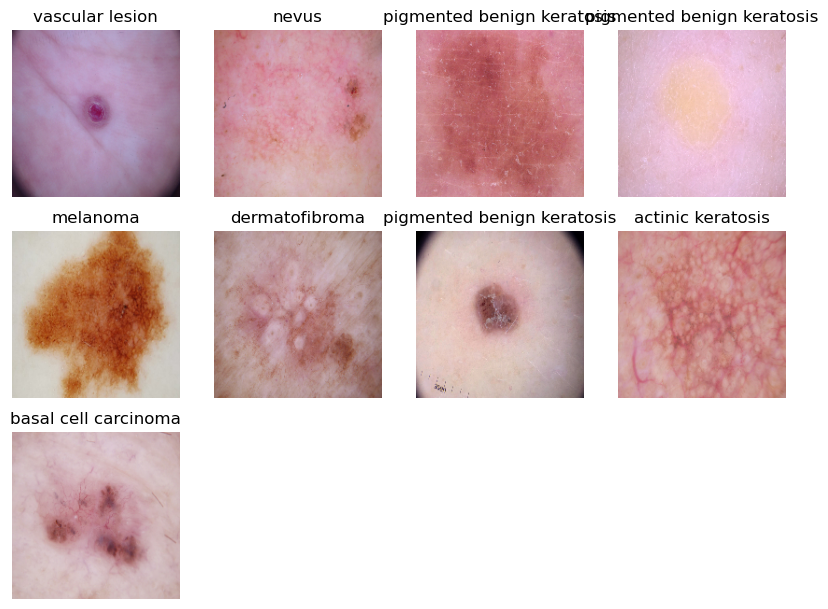

In [310]:


plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [311]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [312]:
### Your code goes here


preprocessor_layer = [tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180,180,3))]
    

In [313]:
# Building the model

input_shape=(180,180,3)
lr= 1e-4
init = 'normal'
activ = 'relu'

model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180,180,3)))
model.add(Conv2D(32, kernel_size=(3,3) ,activation ='relu', input_shape = input_shape))
model.add(Conv2D(32, kernel_size=(3,3) ,activation ='relu', input_shape = input_shape))
model.add((MaxPool2D(pool_size=(2,2))))

model.add(Conv2D(64, kernel_size=(3,3) ,activation ='relu', input_shape = input_shape))
model.add(BatchNormalization())
model.add((MaxPool2D(pool_size=(2,2))))

model.add(Conv2D(64, kernel_size=(3,3) ,activation ='relu', input_shape = input_shape))
model.add(BatchNormalization())
model.add((MaxPool2D(pool_size=(2,2))))

model.add(Flatten())

model.add(Dense(512,activation ='relu'))

model.add(Activation ('softmax'))


model.summary()


Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_43 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 module_wrapper_745 (ModuleW  (None, 178, 178, 32)     896       
 rapper)                                                         
                                                                 
 module_wrapper_746 (ModuleW  (None, 176, 176, 32)     9248      
 rapper)                                                         
                                                                 
 module_wrapper_747 (ModuleW  (None, 88, 88, 32)       0         
 rapper)                                                         
                                                                 
 module_wrapper_748 (ModuleW  (None, 86, 86, 64)       18496     
 rapper)                                             

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [314]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

In [315]:
# View the summary of all layers
model.summary()

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_43 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 module_wrapper_745 (ModuleW  (None, 178, 178, 32)     896       
 rapper)                                                         
                                                                 
 module_wrapper_746 (ModuleW  (None, 176, 176, 32)     9248      
 rapper)                                                         
                                                                 
 module_wrapper_747 (ModuleW  (None, 88, 88, 32)       0         
 rapper)                                                         
                                                                 
 module_wrapper_748 (ModuleW  (None, 86, 86, 64)       18496     
 rapper)                                             

### Train the model

In [316]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 93s 2s/step - loss: 7.1132 - accuracy: 0.2857 - val_loss: 7.1487 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 81s 1s/step - loss: 6.2293 - accuracy: 0.3622 - val_loss: 6.6151 - val_accuracy: 0.1588
Epoch 3/20
56/56 [==============================] - 82s 1s/step - loss: 4.9492 - accuracy: 0.4085 - val_loss: 7.5430 - val_accuracy: 0.1499
Epoch 4/20
56/56 [==============================] - 81s 1s/step - loss: 3.3345 - accuracy: 0.4704 - val_loss: 5.3877 - val_accuracy: 0.1544
Epoch 5/20
56/56 [==============================] - 80s 1s/step - loss: 2.1239 - accuracy: 0.5675 - val_loss: 5.0210 - val_accuracy: 0.2215
Epoch 6/20
56/56 [==============================] - 80s 1s/step - loss: 1.7665 - accuracy: 0.6122 - val_loss: 3.3280 - val_accuracy: 0.2304
Epoch 7/20
56/56 [==============================] - 81s 1s/step - loss: 1.1484 - accuracy: 0.6892 - val_loss: 4.7558 - val_accuracy: 0.1611
Epoch 8/20
56/56 [==

### Visualizing training results

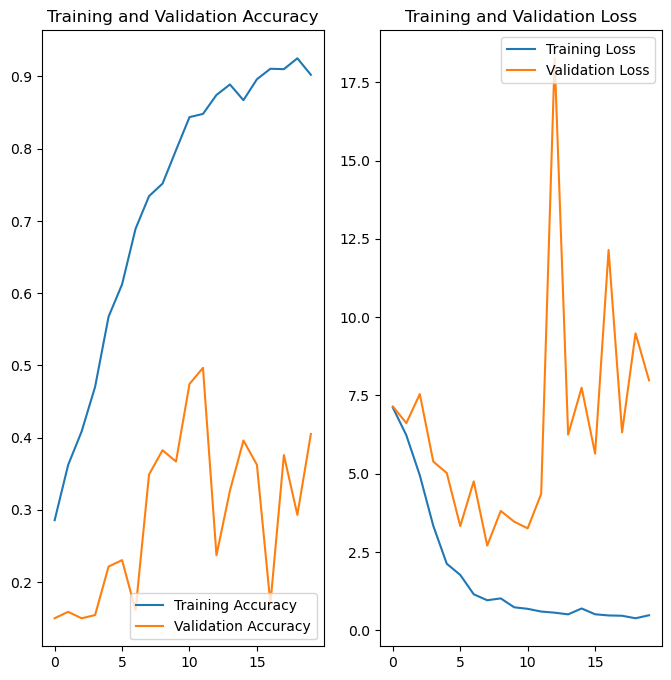

In [317]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

From the above model seems to be overfitting as the  training accuracy is 0.9023 and the validation accuracy is 0.4049. 
the Learning Rate(LR) is high with the poor sampling .

### Write your findings here

In [318]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
datageneration = tf.keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


image_class = ['Actinic_keratosis','Melanoma','Basal_cell_carcinoma','Dermatofibroma','Nevus'
               ,'Pigmented_benign_keratosis', 'Seborrheic_keratosis', 'Squamous_cell_carcinoma', 'Vascular_lesion']




train_batches = datageneration.flow_from_directory(data_dir_train, 
    target_size = (180,180),
    classes = image_class,
    batch_size = 32
 )

valid_batches = datageneration.flow_from_directory(data_dir_test, 
    target_size = (180,180),
    classes = image_class,
    batch_size = 32
)


Found 890 images belonging to 9 classes.
Found 48 images belonging to 9 classes.


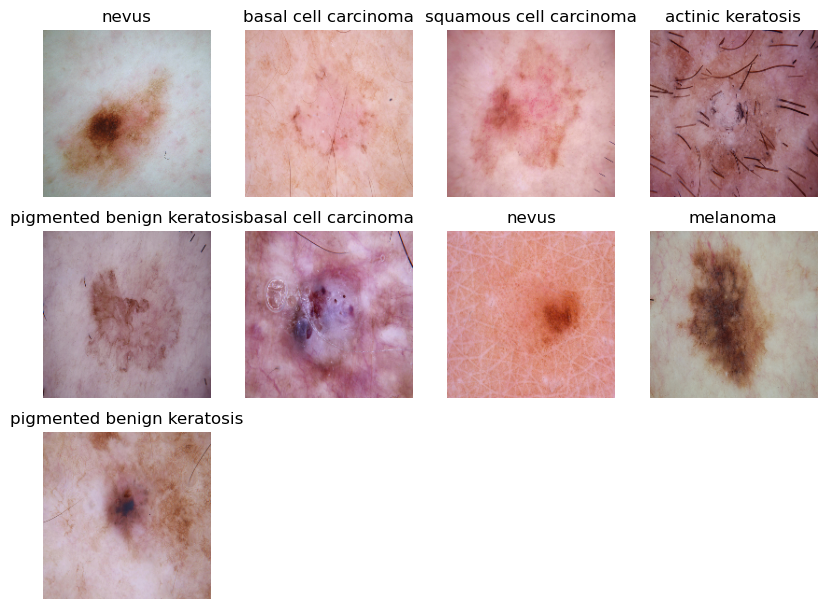

In [320]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [301]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180,180,3)))
model.add(Conv2D(32, kernel_size=(3,3) ,activation ='relu',padding='same',input_shape = input_shape))
model.add(Conv2D(32, kernel_size=(3,3) ,activation ='relu',padding='same'))
model.add((MaxPool2D(pool_size=(2,2))))
model.add(Dropout(0.4))


model.add(Conv2D(64, kernel_size=(3,3) ,activation ='relu'))
model.add(Conv2D(64, kernel_size=(3,3) ,activation ='relu'))
#model.add(BatchNormalization())
model.add((MaxPool2D(pool_size=(2,2))))
model.add(Dropout(0.4))


model.add(Conv2D(128, kernel_size=(3,3) ,activation ='relu'))
model.add(Conv2D(128, kernel_size=(3,3) ,activation ='relu'))
#model.add(BatchNormalization())
model.add((MaxPool2D(pool_size=(2,2))))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(512,activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation ('softmax'))


model.summary()


Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_41 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 module_wrapper_728 (ModuleW  (None, 180, 180, 32)     896       
 rapper)                                                         
                                                                 
 module_wrapper_729 (ModuleW  (None, 180, 180, 32)     9248      
 rapper)                                                         
                                                                 
 module_wrapper_730 (ModuleW  (None, 90, 90, 32)       0         
 rapper)                                                         
                                                                 
 module_wrapper_731 (ModuleW  (None, 90, 90, 32)       0         
 rapper)                                             

### Compiling the model

In [325]:
## Your code goes here

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer='adam',
                  metrics=['accuracy'])

### Training the model

In [326]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  verbose = 1,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 274s 5s/step - loss: 0.7717 - accuracy: 0.8410 - val_loss: 65.1879 - val_accuracy: 0.0962
Epoch 2/20
56/56 [==============================] - 286s 5s/step - loss: 0.8243 - accuracy: 0.8315 - val_loss: 7.1860 - val_accuracy: 0.4049
Epoch 3/20
56/56 [==============================] - 284s 5s/step - loss: 0.6117 - accuracy: 0.8666 - val_loss: 8.9342 - val_accuracy: 0.3960
Epoch 4/20
56/56 [==============================] - 285s 5s/step - loss: 0.5021 - accuracy: 0.9090 - val_loss: 6.4377 - val_accuracy: 0.4609
Epoch 5/20
56/56 [==============================] - 286s 5s/step - loss: 0.6334 - accuracy: 0.8744 - val_loss: 13.9596 - val_accuracy: 0.2349
Epoch 6/20
56/56 [==============================] - 286s 5s/step - loss: 0.5906 - accuracy: 0.8956 - val_loss: 8.2242 - val_accuracy: 0.3714
Epoch 7/20
56/56 [==============================] - 286s 5s/step - loss: 0.5555 - accuracy: 0.8878 - val_loss: 10.8334 - val_accuracy: 0.3445
Epoch 8/20

### Visualizing the results

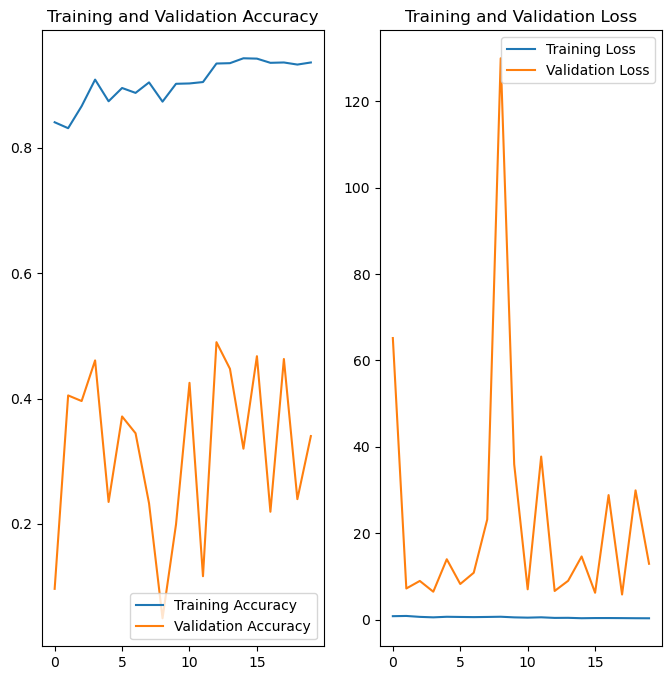

In [327]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right'
          )
plt.title('Training and Validation Loss')
plt.show()

#### Todo: 
Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

After using the drop outs we see that model is being as overfitting , i Couldnt see any improvement as the performance of the model is degrading from the previous model which is overfitting as the training accuracy: 0.9364 and validation accuracy: 0.3400 and having the high Validation loss as 12.90




#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<Figure size 1000x1000 with 0 Axes>

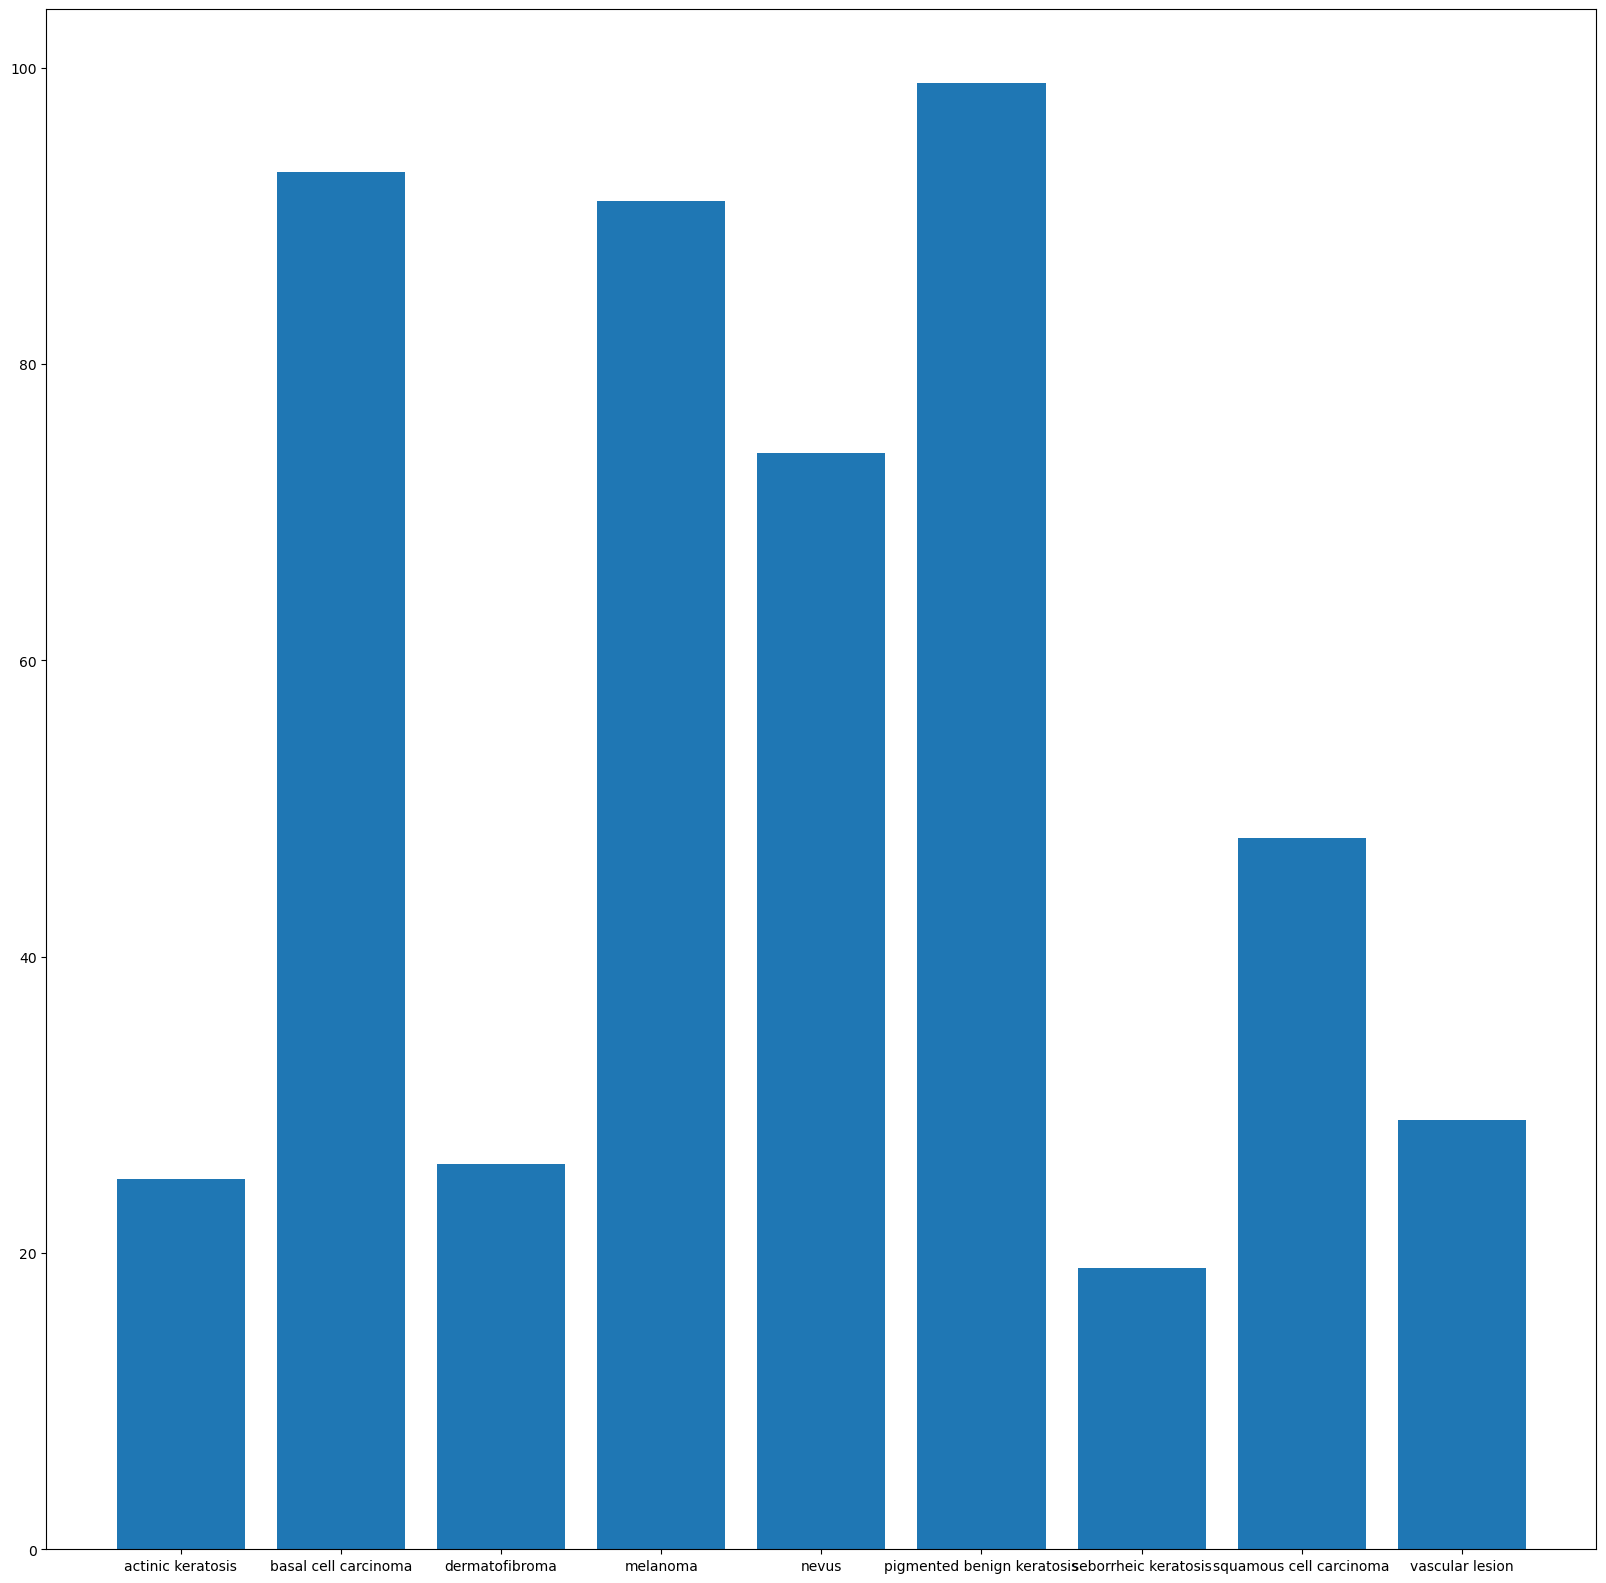

In [329]:
## Your code goes here.

data1 = dict()

for i in class_names:
      data1[i] = []

plt.figure(figsize=(10, 10))
for images, labels in train_ds:
      for i in range(9):
            data1[class_names[labels[i]]].append(images[i].numpy().astype("uint8"))

for i in data1:
      data1 [i] = len(data1[i]) 

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)

plt.bar(range(len(data1)), list(data1.values()), align='center')
plt.xticks(range(len(data1)), list(data1.keys()))
plt.show()


#### **Todo:** Write your findings here: 

Which class has the least number of samples?

Seborrheic keratosis and Actinic keratosis


Which classes dominate the data in terms proportionate number of samples?
Pigmented benign keratosis



#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [100]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [330]:
path_to_training_dataset= "D:\\Users\\bharg\\Desktop\\Skin_cancer_ISIC\\Train\\"

#path_to_training_dataset= pathlib.Path("D://Users//bharg//Downloads//Skin_cancer_ISIC//Train//")
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(path_to_training_dataset) + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to D:\Users\bharg\Desktop\Skin_cancer_ISIC\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x29312A37BB0>: 100%|██████████| 500/500 [00:05<00:00, 87.43 Samples/s]                   


Initialised with 376 image(s) found.
Output directory set to D:\Users\bharg\Desktop\Skin_cancer_ISIC\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x29312BD6EB0>: 100%|██████████| 500/500 [00:06<00:00, 81.04 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to D:\Users\bharg\Desktop\Skin_cancer_ISIC\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x29300211F10>: 100%|██████████| 500/500 [00:05<00:00, 87.66 Samples/s]                   


Initialised with 438 image(s) found.
Output directory set to D:\Users\bharg\Desktop\Skin_cancer_ISIC\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x293085BD370>: 100%|██████████| 500/500 [00:28<00:00, 17.58 Samples/s]                   


Initialised with 357 image(s) found.
Output directory set to D:\Users\bharg\Desktop\Skin_cancer_ISIC\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x29312B81700>: 100%|██████████| 500/500 [00:23<00:00, 21.59 Samples/s]                    


Initialised with 462 image(s) found.
Output directory set to D:\Users\bharg\Desktop\Skin_cancer_ISIC\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x293127C9CA0>: 100%|██████████| 500/500 [00:06<00:00, 80.02 Samples/s]                   


Initialised with 77 image(s) found.
Output directory set to D:\Users\bharg\Desktop\Skin_cancer_ISIC\Train\seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x29303437EB0>: 100%|██████████| 500/500 [00:11<00:00, 44.09 Samples/s]


Initialised with 181 image(s) found.
Output directory set to D:\Users\bharg\Desktop\Skin_cancer_ISIC\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2931267BCD0>: 100%|██████████| 500/500 [00:05<00:00, 87.36 Samples/s]                   


Initialised with 139 image(s) found.
Output directory set to D:\Users\bharg\Desktop\Skin_cancer_ISIC\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x29305816A90>: 100%|██████████| 500/500 [00:06<00:00, 75.26 Samples/s]                  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [331]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [332]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['D:\\Users\\bharg\\Desktop\\Skin_cancer_ISIC\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_0c3fc6ab-6f2e-491e-a217-f45cd962ea71.jpg',
 'D:\\Users\\bharg\\Desktop\\Skin_cancer_ISIC\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_3558dd3c-f972-4472-986d-39ea444cba9c.jpg',
 'D:\\Users\\bharg\\Desktop\\Skin_cancer_ISIC\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_6cc34675-9e1f-4c67-9479-f0f868b23688.jpg',
 'D:\\Users\\bharg\\Desktop\\Skin_cancer_ISIC\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_a90d65eb-49ad-4ea5-b8fe-ec75b0451dbe.jpg',
 'D:\\Users\\bharg\\Desktop\\Skin_cancer_ISIC\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_bf9f358f-6a9b-448d-b3b7-e69473918537.jpg',
 'D:\\Users\\bharg\\Desktop\\Skin_cancer_ISIC\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_9119b59f-a27a-4931-a56f-924f666746c

In [333]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [334]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [335]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

new_df = (df2)

In [336]:
new_df['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [337]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [338]:
data_dir_train="D:\\Users\\bharg\\Desktop\\Skin_cancer_ISIC\\Train\\"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [339]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ="validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [352]:
## your code goes here
model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180,180,3)))
model.add(Conv2D(32, kernel_size=(3,3) ,activation ='relu', input_shape = input_shape))
model.add(Conv2D(32, kernel_size=(3,3) ,activation ='relu',  padding = 'Same'))
model.add((MaxPool2D(pool_size=(2,2))))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3) ,activation ='relu'))
model.add(BatchNormalization())
model.add((MaxPool2D(pool_size=(2,2))))
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size=(3,3) ,activation ='relu'))
model.add(BatchNormalization())
model.add((MaxPool2D(pool_size=(2,2))))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='softmax'))


model.summary()

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_48 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 module_wrapper_817 (ModuleW  (None, 178, 178, 32)     896       
 rapper)                                                         
                                                                 
 module_wrapper_818 (ModuleW  (None, 178, 178, 32)     9248      
 rapper)                                                         
                                                                 
 module_wrapper_819 (ModuleW  (None, 89, 89, 32)       0         
 rapper)                                                         
                                                                 
 module_wrapper_820 (ModuleW  (None, 89, 89, 32)       0         
 rapper)                                             

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [353]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              #loss='categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [354]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 634s 4s/step - loss: 2.7739 - accuracy: 0.3563 - val_loss: 115.8031 - val_accuracy: 0.0000e+00
Epoch 2/30
169/169 [==============================] - 649s 4s/step - loss: 1.7000 - accuracy: 0.4397 - val_loss: 248.5930 - val_accuracy: 0.0883
Epoch 3/30
169/169 [==============================] - 985s 6s/step - loss: 1.4996 - accuracy: 0.4551 - val_loss: 251.7706 - val_accuracy: 0.1084
Epoch 4/30
169/169 [==============================] - 1112s 7s/step - loss: 1.3666 - accuracy: 0.4894 - val_loss: 456.6961 - val_accuracy: 0.1633
Epoch 5/30
169/169 [==============================] - 1122s 7s/step - loss: 1.2929 - accuracy: 0.5232 - val_loss: 266.5275 - val_accuracy: 0.0564
Epoch 6/30
169/169 [==============================] - 1137s 7s/step - loss: 1.2196 - accuracy: 0.5534 - val_loss: 120.6836 - val_accuracy: 0.0676
Epoch 7/30
169/169 [==============================] - 1121s 7s/step - loss: 1.2461 - accuracy: 0.5482 - val_loss: 3.1797 - 

#### **Todo:**  Visualize the model results

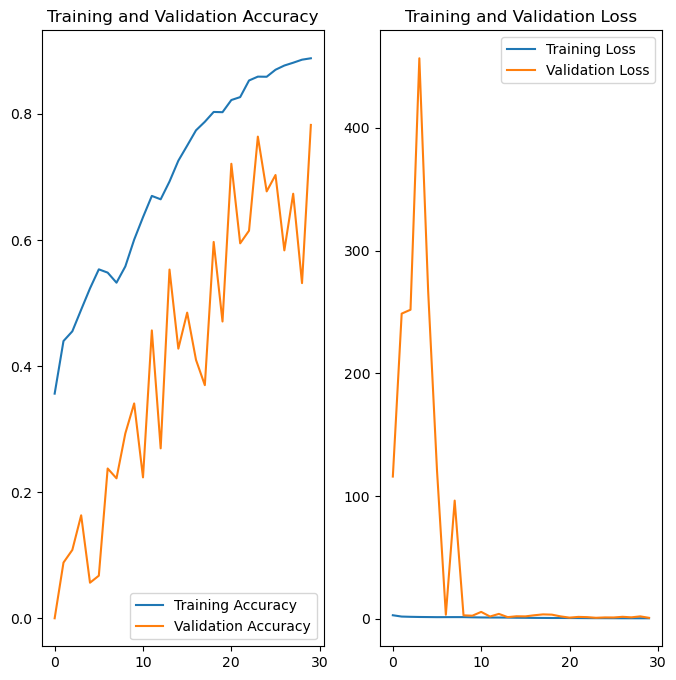

In [355]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



The Class rebalance helps to reduce the Overfitting of the data and the loss is being reduced. 
The result shows that the value of training accuracy as 0.8882 and validation accuracy as 0.7825

In the 1st model was overfitting as the model is generated without any dropouts and the model is overfitted

The 2nd model is added with image generator and dropouts which gave results again overfitted

The 3rd model is generated with batch normalization , Augumentation and dropouts.

This 3rd model which gave the results which is having result as training accuracy as 0.8882 and validation accuracy as 0.7825